## Unit 5 - Financial Planning

In [1]:
 # Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\clear\anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
 # Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

In [3]:
# Set monthly household income
monthly_income = 12000

### Collect Crypto Prices Using the requests Library

In [4]:
 # Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
 # Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [6]:
requests.get(btc_url)
btc_url_data = requests.get(btc_url)
btc_data = btc_url_data.json()

requests.get(eth_url)
eth_url_data = requests.get(eth_url)
eth_data = eth_url_data.json()

# Fetch current BTC price
current = float(btc_data['data']['1']['quotes']['USD']['price'])

# Fetch current ETH price
current2 = float(eth_data['data']['1027']['quotes']['USD']['price'])

# Compute current value of my crpto
my_btc_value = my_btc * current
my_eth_value = my_eth * current2

print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $15444.18
The current value of your 5.3 ETH is $2183.18


### Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)

In [7]:
 # Current amount of shares
my_agg = 200
my_spy = 50

In [8]:
 # Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [9]:
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

start_date = pd.Timestamp("2020-10-21", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-10-21", tz="America/New_York").isoformat()
today_now = pd.Timestamp.today().isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Get current closing prices for SPY and AGG
df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

df_ticker.head()

AGG                                       SPY  \
                             open    high     low    close   volume    open   
time                                                                          
2020-10-21 00:00:00-04:00  117.59  117.64  117.48  117.515  2910530  343.33   

                                                            
                             high    low   close    volume  
time                                                        
2020-10-21 00:00:00-04:00  345.67  342.4  342.69  46745662

In [10]:
# Create and empty DataFrame for closing prices
closing_prices = pd.DataFrame()

# Pick AGG and SPY close prices
closing_prices["AGG"] = df_ticker["AGG"]["close"]
closing_prices["SPY"] = df_ticker["SPY"]["close"]

closing_prices
# Drop the time component of the date
closing_prices.index = closing_prices.index.date
closing_prices.head()

agg_close_price = closing_prices['AGG'][0]
spy_close_price = closing_prices['SPY'][0]

print(f"Current AGG closing price: ${agg_close_price:0.2f}")
print(f"Current SPY closing price: ${spy_close_price:0.2f}")

Current AGG closing price: $117.52
Current SPY closing price: $342.69


In [11]:
 # Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17134.50
The current value of your 200 AGG shares is $23503.00


#### Savings Health Analysis

In [12]:
# Create savings DataFrame
shares = my_spy_value + my_agg_value
crypto = my_btc_value + my_eth_value

savings = [['shares',shares],['crypto', crypto]]

df_savings = pd.DataFrame(savings, columns =['','amount'])
df_savings.set_index(df_savings[''], inplace=True)

# Use the `drop` function to drop specific columns
df_savings.drop(columns=[''], inplace=True)
df_savings

amount
                 
shares  40637.500
crypto  17627.356

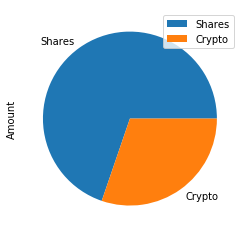

In [13]:
df_savings = pd.DataFrame({"Amount": [shares, crypto]},
                  index=['Shares', 'Crypto'])
plot = df_savings.plot.pie(subplots=True)

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
my_savings = shares + crypto

# Validate saving health
if my_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
else:
    print("Your need more funds")

Congratulations! You have enough money in your emergency fund.


#### Part 2 - Retirement Planning
Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date1 = pd.Timestamp('2015-10-21', tz='America/New_York').isoformat()
end_date1 = pd.Timestamp('2020-10-21', tz='America/New_York').isoformat()

In [16]:
 # Get 5 years' worth of historical data for SPY and AGG!
# Set the tickers
ticker = ["AGG", "SPY"]
    
df_stock_data = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date1,
    end=end_date1
).df

# Display sample data
df_stock_data.head().append(df_stock_data.tail())

AGG                                         SPY  \
                             open      high     low    close   volume    open   
time                                                                            
2015-10-21 00:00:00-04:00  109.73  109.9500  109.73  109.890  1119723  203.61   
2015-10-22 00:00:00-04:00  109.90  110.0500  109.83  109.940  1817244  202.98   
2015-10-23 00:00:00-04:00  109.79  109.7900  109.69  109.740  1344632  207.25   
2015-10-26 00:00:00-04:00  109.85  109.9000  109.74  109.790  1385981  207.30   
2015-10-27 00:00:00-04:00  110.03  110.0300  109.88  109.950  1791888  206.20   
2020-10-15 00:00:00-04:00  118.15  118.1500  117.96  117.970  4977703  343.71   
2020-10-16 00:00:00-04:00  117.99  118.0778  117.88  117.880  3591541  348.96   
2020-10-19 00:00:00-04:00  117.81  117.8700  117.72  117.787  4231106  348.62   
2020-10-20 00:00:00-04:00  117.70  117.7100  117.58  117.640  3624855  343.46   
2020-10-21 00:00:00-04:00  117.59  117.6400  117.48  117.515  2829309  343.33   

                                                              
                             high     low   close     volume  
time                                                          
2015-10-21 00:00:00-04:00  203.79  201.65  201.82   83704739  
2015-10-22 00:00:00-04:00  205.51  202.81  205.22  121670959  
2015-10-23 00:00:00-04:00  207.95  206.30  207.51  103135843  
2015-10-26 00:00:00-04:00  207.37  206.56  206.97   51484043  
2015-10-27 00:00:00-04:00  207.00  205.79  206.58   62899344  
2020-10-15 00:00:00-04:00  348.02  343.13  347.51   50609035  
2020-10-16 00:00:00-04:00  350.75  347.10  347.25   62796942  
2020-10-19 00:00:00-04:00  349.33  341.04  342.02   54462156  
2020-10-20 00:00:00-04:00  346.88  342.64  343.34   48206853  
2020-10-21 00:00:00-04:00  345.67  342.45  342.69   43419032

In [17]:
?MCSimulation

Init signature: MCSimulation(portfolio_data, weights='', num_simulation=1000, num_trading_days=252)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number of simulation sampl

In [18]:
 # Configuring a Monte Carlo simulation to forecast 30 years cumulative returnss
MC_30year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [36]:
MC_30year.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
time                                                                 
2015-10-21 00:00:00-04:00  109.73  109.95  109.73  109.89  1119723   
2015-10-22 00:00:00-04:00  109.90  110.05  109.83  109.94  1817244   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981   
2015-10-27 00:00:00-04:00  110.03  110.03  109.88  109.95  1791888   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-10-21 00:00:00-04:00          NaN  203.61  203.79  201.65  201.82   
2015-10-22 00:00:00-04:00     0.000455  202.98  205.51  202.81  205.22   
2015-10-23 00:00:00-04:00    -0.001819  207.25  207.95  206.30  207.51   
2015-10-26 00:00:00-04:00     0.000456  207.30  207.37  206.56  206.97   
2015-10-27 00:00:00-04:00     0.001457  206.20  207.00  205.79  206.58   

                                                   
                              volume daily_return  
time                                               
2015-10-21 00:00:00-04:00   83704739          NaN  
2015-10-22 00:00:00-04:00  121670959     0.016847  
2015-10-23 00:00:00-04:00  103135843     0.011159  
2015-10-26 00:00:00-04:00   51484043    -0.002602  
2015-10-27 00:00:00-04:00   62899344    -0.001884

In [18]:
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0          1         2         3         4          5          6    \
0     1.000000   1.000000  1.000000  1.000000  1.000000   1.000000   1.000000   
1     0.999801   0.994537  0.997361  0.999789  1.001368   1.006298   1.003299   
2     1.010322   0.994073  0.992105  0.992493  0.999967   1.008432   1.004749   
3     0.985959   1.003006  0.996090  0.994999  1.005352   1.006909   1.024403   
4     0.988640   1.002045  0.993673  0.999711  1.004358   0.997981   1.013974   
5     0.989550   1.003803  0.995173  1.000477  1.000125   1.004867   1.001586   
6     0.982446   0.991858  0.997152  1.009546  1.000080   1.016189   1.010995   
7     0.986608   0.996372  0.990959  1.006219  1.002706   1.015361   1.009765   
8     0.979243   0.985777  0.978957  1.002540  1.001739   1.010738   1.015098   
9     0.989342   0.987010  0.980447  1.009740  1.000308   1.010378   1.019969   
10    0.998910   0.992490  0.987999  1.009585  0.997182   1.008903   1.020686   
11    0.995531   0.989969  0.991011  1.008931  0.990484   1.007892   1.029120   
12    0.991083   0.992094  1.010478  1.007178  0.974278   1.015353   1.034099   
13    0.991621   1.000303  1.012783  1.002435  0.966465   1.025444   1.044338   
14    0.995001   1.009267  1.005482  1.010769  0.951800   1.023094   1.039272   
15    0.992413   1.021070  1.002690  1.015625  0.948289   1.020042   1.046586   
16    0.982800   1.022165  0.995412  1.014092  0.940160   1.020132   1.050187   
17    0.972883   1.024055  1.001164  1.013898  0.932891   1.013706   1.043167   
18    0.969154   1.017669  0.986821  1.019366  0.944804   1.015465   1.050441   
19    0.952433   1.017337  0.984097  1.027460  0.941959   1.009097   1.051581   
20    0.950224   1.019730  0.985796  1.037666  0.933420   1.016530   1.045131   
21    0.944922   1.018149  0.986246  1.039199  0.926897   1.023044   1.053773   
22    0.944513   1.025879  0.983688  1.034654  0.924306   1.029425   1.072722   
23    0.949876   1.021667  0.990406  1.031133  0.927186   1.024250   1.070966   
24    0.953149   1.008740  0.986654  1.023038  0.935648   1.029845   1.074193   
25    0.957408   1.004250  0.976941  1.022042  0.932719   1.025125   1.074360   
26    0.964453   1.002013  0.985015  1.021204  0.930439   1.018009   1.087100   
27    0.968309   1.004799  0.974725  1.024503  0.942016   1.022840   1.087659   
28    0.958346   0.999905  0.987164  1.037748  0.937478   1.031070   1.081821   
29    0.946610   0.993249  0.985188  1.029657  0.925190   1.027273   1.074689   
...        ...        ...       ...       ...       ...        ...        ...   
7531  7.554384  13.040003  5.316134  1.236381  6.745992  33.018735  18.609997   
7532  7.482419  13.004903  5.327438  1.248293  6.810353  32.950324  18.743484   
7533  7.440109  12.894675  5.308363  1.255400  6.773672  32.911812  18.641040   
7534  7.517531  12.946245  5.326826  1.258959  6.788049  32.682071  18.825429   
7535  7.570210  13.030122  5.321461  1.266967  6.764306  32.663295  18.707914   
7536  7.579082  13.078923  5.367212  1.254529  6.785303  32.945037  18.715596   
7537  7.552591  13.024356  5.397071  1.258237  6.832190  33.023287  18.804964   
7538  7.547250  13.057343  5.352639  1.254796  6.804078  33.260754  18.664212   
7539  7.595403  13.002126  5.342702  1.261289  6.750372  33.018340  18.679134   
7540  7.611598  12.902790  5.375315  1.262934  6.713319  32.658063  18.765773   
7541  7.717742  12.836370  5.404896  1.259707  6.674223  32.325101  18.759486   
7542  7.701056  12.835231  5.426283  1.260819  6.598835  32.467301  18.661713   
7543  7.674058  12.855784  5.376285  1.263897  6.604034  32.573927  18.714344   
7544  7.616850  12.858334  5.412277  1.289519  6.600813  32.881037  18.631601   
7545  7.670842  12.961692  5.381030  1.289373  6.583916  32.911863  18.709271   
7546  7.624178  13.151207  5.415801  1.287421  6.629072  32.905397  18.850121   
7547  7.712557  13.195499  5.404557  1.275521  6.650012  32.844436  19.178219   
7548  7.638232  13.060874  5.419204  1.281

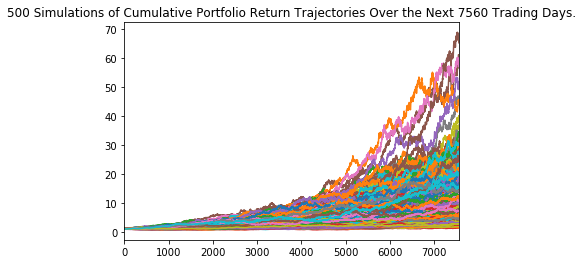

In [19]:
# Plot simulation outcomes
line_plot = MC_30year.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_30year_sim_plot.png", bbox_inches="tight")

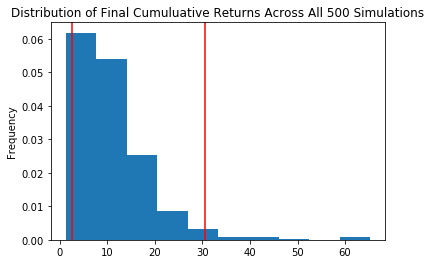

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30year.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_30year_dist_plot.png',bbox_inches='tight')

In [21]:
 # Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_30year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             11.299598
std               8.079478
min               1.255507
25%               6.176873
50%               8.975351
75%              14.277210
max              65.267267
95% CI Lower      2.665787
95% CI Upper     30.558422
Name: 7560, dtype: float64


#### Given an initial investment of $20,000, what is the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [22]:
 # Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $53315.75 and $611168.44


#### How would a 50% increase in the initial investment amount affect the expected portfolio return in dollars at the 95% lower and upper confidence intervals

In [23]:
# Set initial investment
initial_investment1 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower1 = round(tbl[8]*(20000*1.5),2)
ci_upper1 = round(tbl[9]*(20000*1.5),2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment1} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower1} and ${ci_upper1}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $79973.62 and $916752.66


#### Optional Challenge - Early Retirement
Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
start_date5 = pd.Timestamp('2015-10-21', tz='America/New_York').isoformat()
end_date5 = pd.Timestamp('2020-10-21', tz='America/New_York').isoformat()
ticker5 = ["AGG", "SPY"]
    
five_stock_data = alpaca.get_barset(
    ticker5,
    timeframe,
    start=start_date5,
    end=end_date5
).df

# Display sample data
MC_fiveyear = MCSimulation(
    portfolio_data = five_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.003505  1.001058  0.995948  0.993510  1.001551  1.006125  0.987956   
2     1.006210  1.003375  1.000943  0.990658  0.999026  1.012871  0.997491   
3     1.003157  0.998861  1.007697  0.983680  1.007231  1.003734  0.992501   
4     1.003820  0.996349  1.003709  0.994194  1.011025  0.998235  0.995236   
5     0.987563  0.984016  1.006696  0.995285  1.031887  0.999108  0.995302   
6     0.995428  0.981795  1.003753  0.995919  1.022491  0.987136  0.985269   
7     0.994617  0.991840  0.999222  0.992158  1.023873  0.985125  0.984728   
8     1.004398  0.991025  1.017334  1.003018  1.024963  1.002498  0.996009   
9     1.001138  0.980952  1.012036  1.009923  1.031521  0.995984  0.996824   
10    1.009217  0.981787  1.021408  1.004483  1.036540  0.993393  0.990587   
11    1.005410  0.978816  1.029570  0.991665  1.022406  0.988153  0.997245   
12    0.996458  0.969689  1.039329  0.986154  1.014509  0.991146  1.009586   
13    1.009361  0.970579  1.037247  0.984552  1.014992  0.994243  1.010183   
14    1.012004  0.972005  1.037732  0.975892  1.014817  1.014709  1.003286   
15    1.008596  0.964625  1.045165  0.976686  1.011654  1.013613  1.007499   
16    1.005015  0.968901  1.055492  0.982086  1.024130  1.020648  1.014285   
17    1.010214  0.966207  1.054660  0.982465  1.036382  1.030767  1.020868   
18    0.999034  0.957768  1.047948  0.990238  1.035809  1.020191  1.019342   
19    1.009059  0.953204  1.064212  0.982522  1.050962  1.023726  1.021325   
20    1.010625  0.948908  1.061578  0.986511  1.057677  1.017102  1.012636   
21    1.002157  0.955544  1.067953  0.988602  1.061958  1.002282  1.011336   
22    1.010367  0.964403  1.048551  0.995907  1.059602  0.991610  1.008873   
23    1.020443  0.973530  1.053709  0.999652  1.057335  0.989258  1.015637   
24    1.013890  0.992268  1.041083  1.006294  1.059164  0.998788  1.011458   
25    1.013286  0.999484  1.056974  1.009398  1.055945  0.992302  1.010660   
26    1.014685  1.004068  1.047328  1.016925  1.053165  0.991802  1.009503   
27    1.006739  1.001065  1.046050  1.002070  1.066836  0.973060  1.009917   
28    1.014211  0.987545  1.037109  0.996573  1.060088  0.973415  1.025392   
29    1.020618  0.989995  1.040152  1.012458  1.056153  0.968791  1.035909   
...        ...       ...       ...       ...       ...       ...       ...   
1231  1.605011  1.586932  1.439954  1.392808  1.585357  1.922700  0.781556   
1232  1.610564  1.570336  1.444535  1.370646  1.584736  1.935006  0.782481   
1233  1.610888  1.570304  1.460958  1.365455  1.566846  1.931447  0.784927   
1234  1.602542  1.574382  1.449971  1.354626  1.579906  1.940002  0.781418   
1235  1.589693  1.581426  1.435878  1.350377  1.603490  1.973631  0.786155   
1236  1.605757  1.588636  1.436136  1.351450  1.595362  1.955241  0.790437   
1237  1.605194  1.589116  1.421014  1.357165  1.595076  1.948390  0.792429   
1238  1.608315  1.579449  1.431361  1.355980  1.601121  1.930211  0.792518   
1239  1.607901  1.577935  1.427843  1.361562  1.608987  1.944028  0.793858   
1240  1.597427  1.589947  1.408801  1.358084  1.622662  1.938054  0.795788   
1241  1.593875  1.600214  1.401282  1.363248  1.607246  1.935015  0.797872   
1242  1.595199  1.617322  1.406017  1.366104  1.612720  1.927199  0.803069   
1243  1.604844  1.622363  1.399938  1.371602  1.619043  1.927147  0.808932   
1244  1.620034  1.617970  1.401794  1.377221  1.608496  1.921184  0.816995   
1245  1.630328  1.620647  1.409992  1.374274  1.609904  1.927698  0.818858   
1246  1.627562  1.617922  1.405994  1.364337  1.620636  1.926527  0.821939   
1247  1.641962  1.615301  1.390158  1.358907  1.640030  1.933929  0.818329   
1248  1.633680  1.614516  1.399193  1.358921  1.654258  1.930789  0.810100   
1249  1.636104  1.593904  1.385408  1.336350  1.677371  1.930551  0.804604   
1250  1.629265  1.585441  1.39797

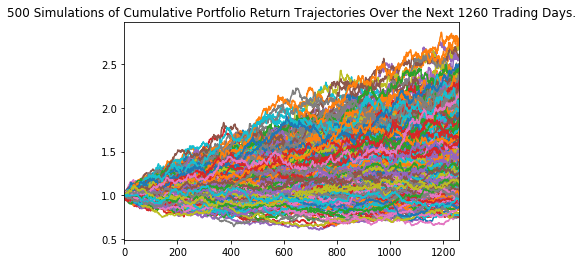

In [26]:
 # Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

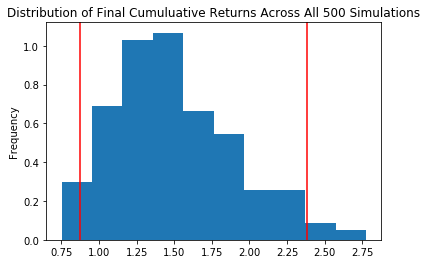

In [27]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.499305
std               0.405139
min               0.751004
25%               1.207317
50%               1.445018
75%               1.743532
max               2.775401
95% CI Lower      0.872294
95% CI Upper      2.381484
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*60000,2)
ci_upper_five = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $159947.24 and $1833505.32


 ##### Ten Years Retirement Option

In [30]:
 # Configuring a Monte Carlo simulation to forecast 10 years cumulative returns

start_date_10 = pd.Timestamp('2015-10-21', tz='America/New_York').isoformat()
end_date_10 = pd.Timestamp('2020-10-21', tz='America/New_York').isoformat()
ticker_10 = ["AGG", "SPY"]
    
ten_stock_data = alpaca.get_barset(
    ticker_10,
    timeframe,
    start=start_date_10,
    end=end_date_10
).df

# Display sample data
MC_tenyear = MCSimulation(
    portfolio_data = ten_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [31]:
 # Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.008129  1.005312  0.999317  0.998258  1.009764  0.988274  1.000949   
2     1.007296  1.021949  0.996079  1.001948  1.002597  0.987517  0.996765   
3     1.010016  1.017953  0.993492  1.011731  1.006258  0.993672  1.004951   
4     1.001126  1.021176  1.012636  1.021741  0.992847  0.986171  1.007747   
5     1.004937  1.018320  1.009228  1.015528  0.989053  0.981258  1.007852   
6     1.009263  1.039589  1.023634  1.013706  0.992363  0.985687  1.001454   
7     1.007625  1.030179  1.019153  1.007320  0.996934  0.992536  0.998753   
8     1.005655  1.026561  1.013697  1.015582  0.988317  0.985640  1.004005   
9     1.011532  1.016854  1.005864  1.015380  0.980897  0.988739  1.008672   
10    1.019103  1.034842  1.020067  1.013395  0.982503  0.982705  0.996243   
11    1.030936  1.022667  1.012286  1.017424  0.990980  0.990471  0.994025   
12    1.041533  1.035369  1.008016  1.014885  0.997080  1.000015  0.994670   
13    1.053090  1.043768  1.017629  1.029268  1.001214  0.988609  0.991599   
14    1.064415  1.042264  1.022635  1.037190  1.017498  0.976743  1.003044   
15    1.064907  1.044283  1.022058  1.033562  1.002607  0.984801  1.008383   
16    1.067619  1.054714  1.019023  1.034942  1.006914  0.990093  1.014919   
17    1.063463  1.064257  1.030345  1.044517  0.985034  0.976237  1.014427   
18    1.070273  1.062505  1.031919  1.041905  0.983343  0.988202  1.009047   
19    1.074375  1.079202  1.037495  1.026479  0.971295  0.978250  0.995277   
20    1.077275  1.080678  1.041085  1.026660  0.969565  0.972844  0.981189   
21    1.095878  1.073619  1.028336  1.022517  0.957618  0.959464  0.985558   
22    1.090927  1.084006  1.043044  1.032277  0.961974  0.961230  0.984612   
23    1.092597  1.079182  1.028709  1.029637  0.962727  0.960264  0.987497   
24    1.093199  1.082101  1.026543  1.031866  0.968228  0.965542  0.999059   
25    1.092087  1.078048  1.043510  1.028062  0.960992  0.969261  0.998815   
26    1.090792  1.075513  1.049040  1.021164  0.960163  0.957591  0.985365   
27    1.090134  1.072987  1.062144  1.024399  0.953480  0.949534  0.984665   
28    1.095791  1.070910  1.065028  1.019695  0.949978  0.951020  0.975768   
29    1.095021  1.075088  1.054773  1.010468  0.951792  0.960140  0.981640   
...        ...       ...       ...       ...       ...       ...       ...   
2491  1.796291  3.202556  2.291769  2.227802  1.569326  2.055153  2.174661   
2492  1.803186  3.186338  2.290760  2.238861  1.565666  2.047896  2.148005   
2493  1.820905  3.162588  2.308529  2.234962  1.564477  2.059990  2.124872   
2494  1.797012  3.173647  2.302173  2.258271  1.559454  2.065957  2.108928   
2495  1.823754  3.176158  2.290016  2.239629  1.562192  2.066310  2.095922   
2496  1.828557  3.217320  2.289312  2.222863  1.570546  2.066207  2.118782   
2497  1.807000  3.245613  2.285910  2.220266  1.558069  2.046571  2.127876   
2498  1.804576  3.244972  2.287558  2.204352  1.552023  2.041318  2.109062   
2499  1.790637  3.231694  2.291094  2.211074  1.567615  2.058028  2.116270   
2500  1.792847  3.214871  2.302095  2.211951  1.577676  2.081376  2.102134   
2501  1.789116  3.264013  2.308194  2.206907  1.594483  2.057583  2.123678   
2502  1.797114  3.255229  2.295526  2.235591  1.589596  2.066750  2.125717   
2503  1.803794  3.276948  2.270317  2.213422  1.585359  2.082447  2.120209   
2504  1.834862  3.294188  2.277243  2.221388  1.594510  2.081644  2.117457   
2505  1.832585  3.297771  2.284290  2.220193  1.593089  2.075741  2.133110   
2506  1.827143  3.271952  2.267157  2.222102  1.589039  2.102008  2.137410   
2507  1.832603  3.307924  2.283570  2.208680  1.566094  2.111206  2.134625   
2508  1.826980  3.305571  2.266463  2.198931  1.547512  2.110618  2.154720   
2509  1.833372  3.279645  2.278770  2.207029  1.548474  2.103193  2.154789   
2510  1.819328  3.287780  2.29020

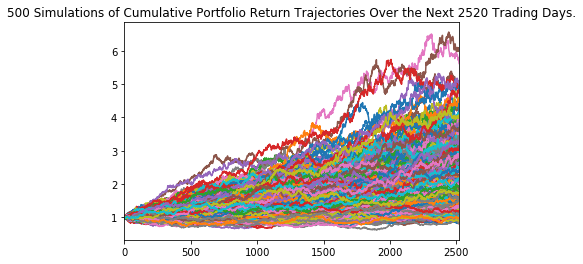

In [32]:
 # Plot simulation outcomes
 # Plot simulation outcomes
line_plot = MC_tenyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_tenyear_sim_plot.png", bbox_inches="tight")

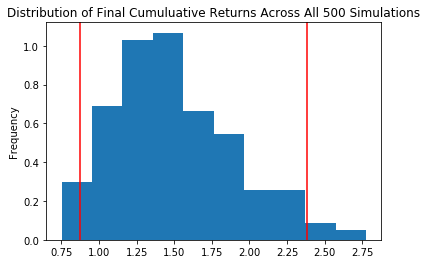

In [33]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_tenyear_dist_plot.png',bbox_inches='tight')

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              2.298059
std               0.828054
min               0.807647
25%               1.728015
50%               2.164890
75%               2.724744
max               6.023516
95% CI Lower      1.017430
95% CI Upper      4.301539
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment_ten = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*60000,2)
ci_upper_ten = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $159947.24 and $1833505.32
